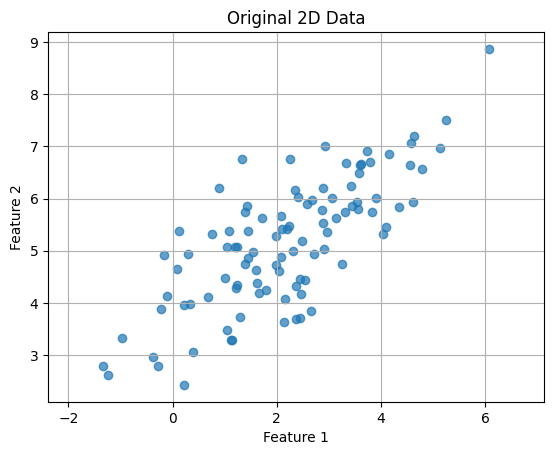

In [1]:
#1.Plot the original data to observe its 2D distribution
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)
# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [2]:
#2.Center the data (subtract mean from each feature)
X_centered = X - np.mean(X, axis=0)
print("Centered Data):\n", X_centered[:6])


Centered Data):
 [[-0.96052321 -0.89468793]
 [-1.89165135 -0.22607541]
 [ 0.308911    0.01591591]
 [-3.15190687 -1.84481145]
 [ 0.38855616  0.73058645]
 [ 0.78923551  0.19638612]]


In [3]:
#3.Compute the covariance matrix
cov_matrix = np.cov(X_centered.T)
print("\nCovariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[2.28165958 1.40082016]
 [1.40082016 1.50064765]]


In [4]:
#4.Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [3.34538606 0.43692116]
Eigenvectors:
 [[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


In [5]:
#5.Project the data onto the first principal component
X_pca_1d = X_centered @ eigenvectors[:, 0]
print("\n1D Project:\n", X_pca_1d[:6])


1D Project:
 [-1.30603963 -1.64324718  0.25564442 -3.62587129  0.75127862  0.74731976]


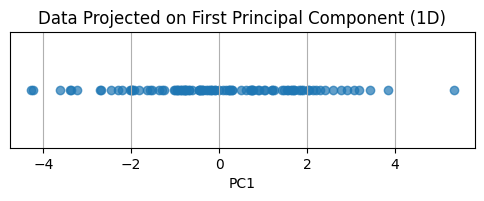

In [6]:
#6.Plot the 1D projection and compare it with the original.
plt.figure(figsize=(6, 1.5))
plt.scatter(X_pca_1d, np.zeros_like(X_pca_1d), alpha=0.7)
plt.title("Data Projected on First Principal Component (1D)")
plt.xlabel("PC1")
plt.yticks([])
plt.grid(True)
plt.show()


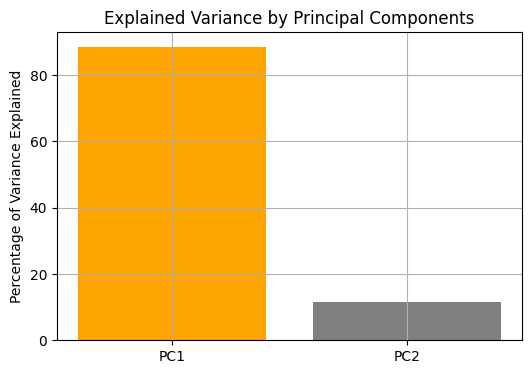

In [7]:
#7.Plot the amount of variance explained by each component
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(6, 4))
plt.bar(['PC1', 'PC2'], explained_variance_ratio * 100, color=['orange', 'gray'])
plt.title("Explained Variance by Principal Components")
plt.ylabel("Percentage of Variance Explained")
plt.grid(True)
plt.show()

***Use t-SNE to visualize how it separates points from different classes in 2D space***

In [8]:
# Inspect the shape of X and y. What do the 64 features represent?

In [19]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
digits = load_digits()
digits = load_digits()
X = digits.data       # Shape: (1797, 64)
y = digits.target     # Shape: (1797,)

print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {y.shape}")

Shape of X: (1797, 64)
Shape of Y: (1797,)


So basically feature represents that the Each image is 8x8 pixels, flattened into 64 features.

In [20]:
#Apply TSNE from sklearn.manifold with n_components=2
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', random_state=42)
X_tsne = tsne.fit_transform(X)


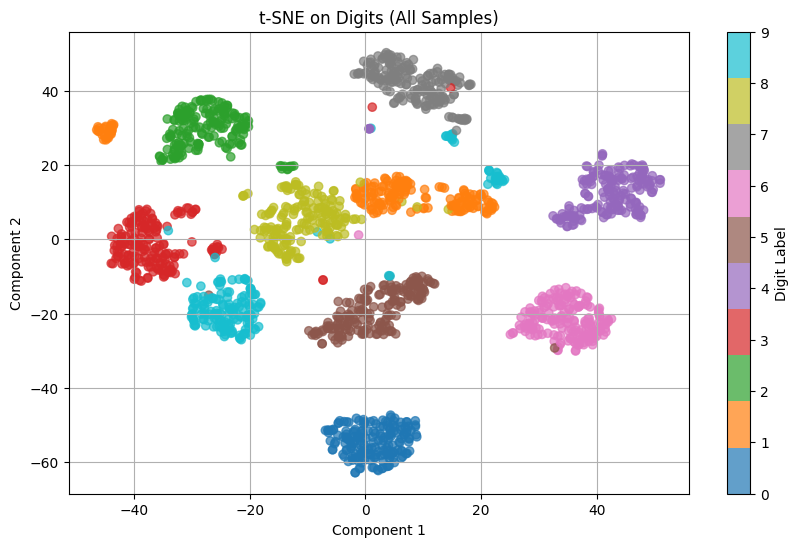

In [21]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("t-SNE on Digits (All Samples)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


t-SNE with perplexity = 5


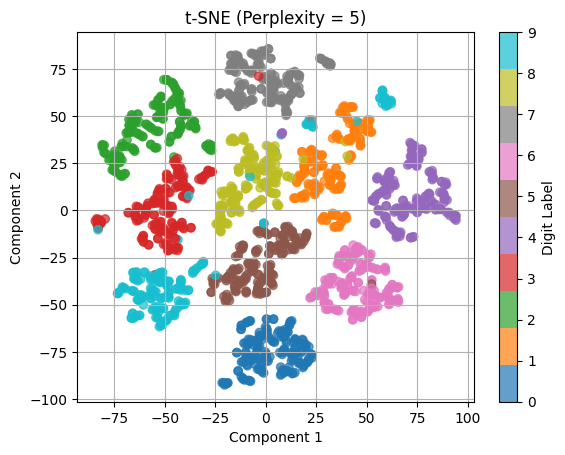

In [22]:
# perplexity value = 5
print("t-SNE with perplexity = 5")
tsne_5 = TSNE(n_components=2, perplexity=5, init='pca', learning_rate='auto', random_state=42)
X_tsne_5 = tsne_5.fit_transform(X)

plt.scatter(X_tsne_5[:, 0], X_tsne_5[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.title("t-SNE (Perplexity = 5)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.colorbar(label="Digit Label")
plt.show()




t-SNE with perplexity = 30


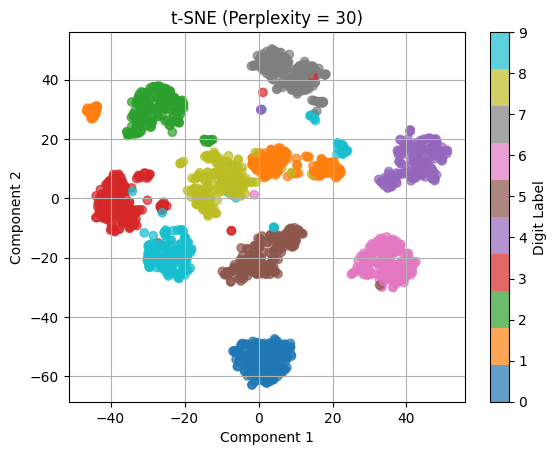

In [23]:
# perplexity  value = 30
print("t-SNE with perplexity = 30")
tsne_30 = TSNE(n_components=2, perplexity=30, init='pca', learning_rate='auto', random_state=42)
X_tsne_30 = tsne_30.fit_transform(X)

plt.scatter(X_tsne_30[:, 0], X_tsne_30[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.title("t-SNE (Perplexity = 30)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.colorbar(label="Digit Label")
plt.show()


t-SNE with perplexity = 50


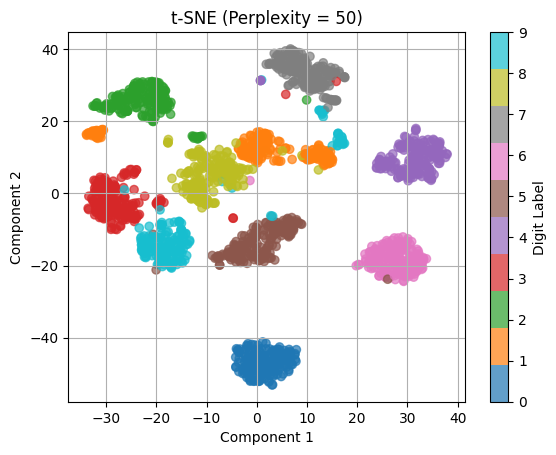

In [24]:
# t-SNE with perplexity = 50
print("t-SNE with perplexity = 50")
tsne_50 = TSNE(n_components=2, perplexity=50, init='pca', learning_rate='auto', random_state=42)
X_tsne_50 = tsne_50.fit_transform(X)

plt.scatter(X_tsne_50[:, 0], X_tsne_50[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.title("t-SNE (Perplexity = 50)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.colorbar(label="Digit Label")
plt.show()

So here if we compare a perplexity value on how clusters changes , here for value 5- It is fine local clusters and more spread out, for 30 - It has a good balance of local and global structure and for 50, It is tighter global
in structure.

